# Đọc dữ liệu 

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import roc_auc_score,f1_score,accuracy_score

In [2]:
import os
import tensorflow as tf
import numpy as np
import random as rn
from google.colab import drive

In [3]:
def reset_random_seeds():
   os.environ['PYTHONHASHSEED']=str(1)
   tf.random.set_seed(1)
   np.random.seed(1)
   rn.seed(1)

reset_random_seeds()

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:

data = loadmat('/content/drive/MyDrive/data/data_set_rnd_norm.mat')

In [6]:
Y = data['dr'].squeeze()
X = data['X'].T
X = X.reshape(-1,80, 56,1)
d = data['d'].squeeze()
dia = data['dia'].squeeze()
Vol = data['Vol'].squeeze() # Vol = d*(dia**2)/4*3.14

In [7]:
IDX_NO = int(120*len(X)/720)
X_valid = X[:IDX_NO]; Y_valid = Y[:IDX_NO]; d_valid = d[:IDX_NO]; dia_valid = dia[:IDX_NO]; Vol_valid = Vol[:IDX_NO]
X = X[IDX_NO:]; Y = Y[IDX_NO:]; d = d[IDX_NO:]; dia = dia[IDX_NO:]; Vol = Vol[IDX_NO:]


In [8]:
input_valid_dia = None; input_valid_d = None; ratio = 0.2 

In [9]:
if input_valid_dia is not None:
        idx = (dia != input_valid_dia[0])
        for e in input_valid_dia[1:]:
            ide = (dia != e)
            idx = np.all([idx,ide],axis=0)
    
elif input_valid_d is not None:
        idx = (d != input_valid_d[0])
        for e in input_valid_d[1:]:
            ide = (d != e)
            idx = np.all([idx,ide],axis=0)
else: # Select by volumne = d & dia
        # for i in range(len(dia)):
        #     idx_dia = np.random.choice([6,8,10,12,14])            
        # temp = dia[dia>0] # For only corrosion
        # dia_rnd = np.random.choice(temp,len(dia),replace=True) # Take random dia with size = len(dia)
        # idx_dia = (dia_rnd == dia)
        # temp = d[d>0] # For only corrosion
        # d_rnd = np.random.choice(temp,len(d),replace=True) # Take random d with size = len(d)
        # idx_d = (d_rnd == d)        
        # idx = np.all([idx_dia, idx_d], axis = 0)
        
        V = list(set(Vol[Vol > 0])) # Only corrosion
        Vs = np.random.choice(V,int(len(V)*ratio)) # Vol for valid
        idx = (Vol != Vs[0])
        for e in Vs[1:]:
            ide = (Vol != e)
            idx = np.all([idx,ide],axis=0)

In [10]:
X_train = X[idx]; Y_train = Y[idx]; d_train = d[idx]; dia_train = dia[idx]; Vol_train = Vol[idx]

In [11]:
idx = np.logical_not(idx) # Valid data
Y_valid = np.concatenate((Y_valid,Y[idx])); X_valid = np.vstack((X_valid,X[idx]))
d_valid = np.concatenate((d_valid,d[idx])); dia_valid = np.concatenate((dia_valid,dia[idx])); Vol_valid = np.concatenate((Vol_valid,Vol[idx]))

In [12]:
labels = ['N','B', 'F', 'L', 'R']
NO_CLASSES = Y.max() - Y.min() + 1

In [13]:
Y_train = to_categorical(Y_train, num_classes = NO_CLASSES)
Y_valid = to_categorical(Y_valid, num_classes = NO_CLASSES)

In [14]:
Y_train = np.argmax(Y_train,axis=1)
Y_valid = np.argmax(Y_valid,axis=1)

In [15]:
print('X_train: ', X_train.shape)
print('Y_train: ', Y_train.shape)
print('X_valid: ', X_valid.shape)
print('Y_valid: ', Y_valid.shape)

print('\nTrain dataset:')
print('Depths in dataset: ', set(d_train))
print('Dias in dataset: ', set(dia_train))
print('Volumes in dataset: ', set(Vol_train))

print('\nTrain dataset:')
print('Depths in dataset: ', set(d_valid))
print('Dias in dataset: ', set(dia_valid))
print('Volumes in dataset: ', set(Vol_valid))

print(X_train[1].shape)

X_train:  (12800, 80, 56, 1)
Y_train:  (12800,)
X_valid:  (5200, 80, 56, 1)
Y_valid:  (5200,)

Train dataset:
Depths in dataset:  {0.0, 0.6, 0.1, 0.3, 0.9, 1.27}
Dias in dataset:  {0, 6, 8, 10, 12, 14}
Volumes in dataset:  {0.0, 2.826, 5.024, 7.85, 8.478, 138.474, 15.072, 16.956, 23.55, 33.912, 35.8902, 45.216, 46.158, 47.1, 63.8048, 67.824, 195.4022, 70.65, 92.316, 99.695, 101.736}

Train dataset:
Depths in dataset:  {0.0, 0.6, 0.1, 1.27, 0.9}
Dias in dataset:  {0, 6, 8, 12, 14}
Volumes in dataset:  {0.0, 11.304, 15.386, 143.5608, 25.434, 30.144}
(80, 56, 1)


hàm xem các kết quả dự đoán

In [16]:
def view_result(y_pred,y_pred_pro,Y_valid):
    print('accuracy data: '+ str(accuracy_score(Y_valid,y_pred)))

    f1_sco = f1_score(Y_valid, y_pred, average=None)
    print('F1 score data: '+str(np.mean(f1_sco)))

    ras = roc_auc_score(Y_valid,y_pred_pro, multi_class='ovr')
    print('roc auc score: '+str(np.mean(ras)))

# Phân tích data đã cho theo dạng hog

phân tích data theo dạng hog


In [ ]:
from skimage.feature import hog, greycomatrix, greycoprops

In [ ]:
# xây dựng hàm tính hog
from skimage.feature import hog

def f_hog(x):
  f_hog_lis = []
  for i in range(len(x)):
      f = hog(x[i], orientations=9, pixels_per_cell=(4,4),cells_per_block=(2,2), visualize=False)
      f_hog_lis.append(f)
  return f_hog_lis

In [ ]:
import numpy as np
f_hog_train = f_hog(X_train)
f_hog_train = np.array(f_hog_train)

In [ ]:
f_hog_valid = f_hog(X_valid)
f_hog_valid = np.array(f_hog_valid)

In [ ]:
print(f_hog_train.shape)
print(f_hog_valid.shape)

(12800, 8892)
(5200, 8892)


pca data theo hog


In [ ]:
from sklearn import decomposition
n_components = 256
pca = decomposition.PCA(n_components=n_components)

In [ ]:
# fit data
pca.fit(f_hog_train)
print('Retained ratio: ', np.sum(pca.explained_variance_ratio_))

Retained ratio:  0.7981349801736308


In [ ]:
Z_train = pca.transform(f_hog_train)
Z_valid = pca.transform(f_hog_valid)

In [ ]:
print(Z_train.shape)
Z_valid.shape

(12800, 256)


(5200, 256)

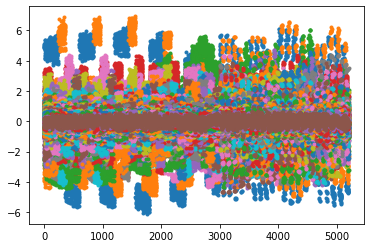

In [ ]:
plt.plot(Z_valid,'.')

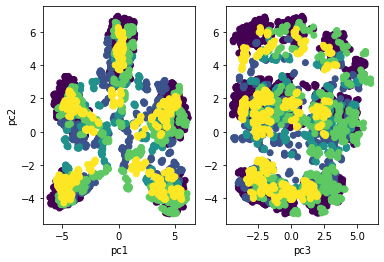

Text(0, 0.5, 'Cumulative variance')

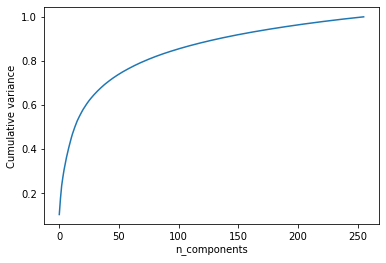

In [ ]:
plt.figure()
plt.subplot(1,2,1)
plt.scatter(Z_valid[:,0],Z_valid[:,1],c=Y_valid)
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.subplot(1,2,2)
plt.scatter(Z_valid[:,2],Z_valid[:,1],c=Y_valid)
plt.xlabel('pc3')        
plt.show()

plt.figure()
cum_var = np.cumsum(pca.explained_variance_ratio_/np.sum(pca.explained_variance_ratio_))
plt.plot(cum_var)
plt.xlabel('n_components')
plt.ylabel('Cumulative variance')

show thử các dữ liệu mà hàm valid

In [ ]:
show = []
show_item = 0
for i in range(1,len(Y_valid),500):
    if show_item == Y_valid[i]:
        show.append(i)
        show_item += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes curre

<function matplotlib.pyplot.show>

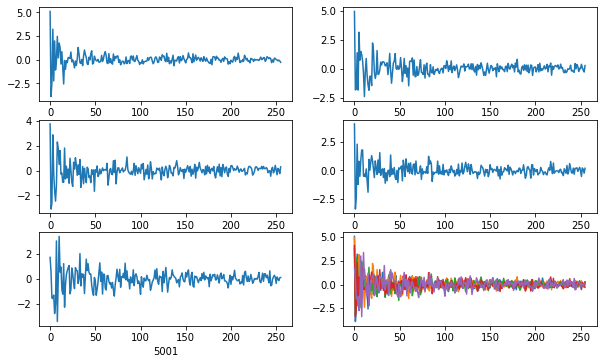

In [ ]:
plt.figure(figsize=(10,10))
num=1
for i in show:
    plt.subplot(5,2,num)
    plt.plot(Z_valid[i])
    plt.xlabel(i)
    num+=1
for i in show:
    plt.subplot(5,2,num)
    plt.plot(Z_valid[i])
plt.show

## Đưa data đã xử lý theo hog vào fit với các model

knn

In [ ]:
# fit model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=100, p=2)
knn.fit(Z_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=100, p=2,
                     weights='uniform')

In [ ]:
knn_y_pred = knn.predict(Z_valid)
knn_y_pred_pro = knn.predict_proba(Z_valid)

In [ ]:
view_result(knn_y_pred,knn_y_pred_pro,Y_valid)

accuracy data: 0.8642307692307692
F1 score data: 0.8175959520139893
roc auc score: 0.9835295009951505


svm

In [ ]:
from sklearn import svm

svm = svm.SVC(probability=True)

In [ ]:
svm.fit(Z_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
svm_y_pred = svm.predict(Z_valid)

In [ ]:
svm_y_pred_pro = svm.predict_proba(Z_valid)

In [ ]:
view_result(svm_y_pred,svm_y_pred_pro,Y_valid)

accuracy data: 0.9536538461538462
F1 score data: 0.9285900151811056
roc auc score: 0.997692590642783


logistic

In [ ]:
from sklearn.linear_model import LogisticRegression

lgt = LogisticRegression()
lgt.fit(Z_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lgt_y_pred = lgt.predict(Z_valid)

In [ ]:
lgt_y_pred_pro = lgt.predict_proba(Z_valid)

In [ ]:
view_result(lgt_y_pred,lgt_y_pred_pro,Y_valid)

accuracy data: 0.9265384615384615
F1 score data: 0.8928197345055736
roc auc score: 0.9812517796372606


random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=24)

In [ ]:
rf.fit(Z_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=24, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf_y_pred = rf.predict(Z_valid)
rf_y_pred_pro = rf.predict_proba(Z_valid)

In [ ]:
view_result(rf_y_pred,rf_y_pred_pro,Y_valid)

accuracy data: 0.9157692307692308
F1 score data: 0.8827910436314907
roc auc score: 0.9908698959997757


Extreme Gradient Boosting(XGBoost)

In [ ]:
import xgboost as xgb

In [ ]:
xg = xgb.XGBClassifier(max_depth=24,n_estimators=10,n_jobs=1,objective='multi:softmax')

In [ ]:
xg.fit(Z_train,Y_train)

In [ ]:
xg_y_pred = xg.predict(Z_valid)

In [ ]:
xg_y_pred_pro = xg.predict_proba(Z_valid)

In [ ]:
view_result(xg_y_pred,xg_y_pred_pro,Y_valid)

accuracy data: 0.8340384615384615
F1 score data: 0.7873971286662254
roc auc score: 0.9542847198441399


naive_bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB

In [ ]:
gnb = GaussianNB()

In [ ]:
gnb.fit(Z_train,Y_train)

In [ ]:
gnb_y_pred = gnb.predict(Z_valid)
gnb_y_pred_proba = gnb.predict_proba(Z_valid)

In [ ]:
view_result(gnb_y_pred,gnb_y_pred_proba,Y_valid)

accuracy data: 0.8113461538461538
F1 score data: 0.7265321148646156
roc auc score: 0.9599693221484035


neutral network


In [ ]:
import tensorflow as tf
from tensorflow.keras import models

In [ ]:
# xây dụng model 
model = tf.keras.models.Sequential()
#chuyển dữ liệu về dạng phẳng 28x28 = 1x748
model.add(tf.keras.layers.Flatten())
#tạo ra 2 lớp của model với 128 điểm  
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
#tạo lớp cuối vói 10 điểm 
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(Z_train, Y_train, epochs=10)

Epoch 1/10
400/400 [==============================] - 1s 2ms/step - loss: 0.1943 - accuracy: 0.9523
Epoch 2/10
400/400 [==============================] - 1s 2ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 3/10
400/400 [==============================] - 1s 2ms/step - loss: 5.9066e-04 - accuracy: 1.0000
Epoch 4/10
400/400 [==============================] - 1s 2ms/step - loss: 2.9351e-04 - accuracy: 1.0000
Epoch 5/10
400/400 [==============================] - 1s 2ms/step - loss: 1.7265e-04 - accuracy: 1.0000
Epoch 6/10
400/400 [==============================] - 1s 2ms/step - loss: 1.1067e-04 - accuracy: 1.0000
Epoch 7/10
400/400 [==============================] - 1s 2ms/step - loss: 7.4946e-05 - accuracy: 1.0000
Epoch 8/10
400/400 [==============================] - 1s 2ms/step - loss: 5.2874e-05 - accuracy: 1.0000
Epoch 9/10
400/400 [==============================] - 1s 2ms/step - loss: 3.8131e-05 - accuracy: 1.0000
Epoch 10/10
400/400 [==============================] - 1s 2ms/step - los

nr_y_pred_pro = np.where(nr_y_pred_pro > 0.5, 1, 0)

# PCA data


In [17]:
x_train = np.reshape(X_train,(X_train.shape[0], -1))
x_valid = np.reshape(X_valid,(X_valid.shape[0], -1))

In [18]:
print(x_train.shape)
print(x_valid.shape)

(12800, 4480)
(5200, 4480)


In [ ]:
from sklearn import decomposition
n_components = 1024
pca = decomposition.PCA(n_components=n_components)

In [ ]:
# fit data
pca.fit(f_hog_train)
Z_train = pca.transform(f_hog_train)
Z_valid = pca.transform(f_hog_valid)

In [ ]:
print(Z_train.shape)
Z_valid.shape

(12800, 1024)


(5200, 1024)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes curre

<function matplotlib.pyplot.show>

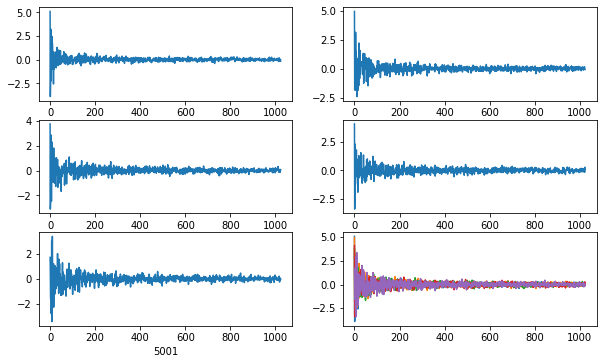

In [ ]:
plt.figure(figsize=(10,10))
num=1
for i in show:
    plt.subplot(5,2,num)
    plt.plot(Z_valid[i])
    plt.xlabel(i)
    num+=1
for i in show:
    plt.subplot(5,2,num)
    plt.plot(Z_valid[i])
plt.show

## Đưa data đã xử lý theo hog vào fit với các model

knn

In [ ]:
# fit model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=100, p=2)
knn.fit(Z_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=100, p=2,
                     weights='uniform')

In [ ]:
knn_y_pred = knn.predict(Z_valid)
knn_y_pred_pro = knn.predict_proba(Z_valid)

In [ ]:
view_result(knn_y_pred,knn_y_pred_pro,Y_valid)

accuracy data: 0.8467307692307692
F1 score data: 0.7943988157767389
roc auc score: 0.9837793323942478


svm

In [19]:
from sklearn import svm

svm = svm.SVC(probability=True)

test_raw_data

In [20]:
svm.fit(x_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [22]:
svm_y_pred = svm.predict(x_valid)

In [23]:
svm_y_pred_pro = svm.predict_proba(x_valid)

In [24]:
view_result(svm_y_pred,svm_y_pred_pro,Y_valid)

accuracy data: 0.9807692307692307
F1 score data: 0.9623931623931623
roc auc score: 0.9993134461917977


end test_raw_data


In [ ]:
svm.fit(Z_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
svm_y_pred = svm.predict(Z_valid)

In [ ]:
svm_y_pred_pro = svm.predict_proba(Z_valid)

In [ ]:
view_result(svm_y_pred,svm_y_pred_pro,Y_valid)

accuracy data: 0.9476923076923077
F1 score data: 0.9224456092717912
roc auc score: 0.9979122067109578


logistic

In [ ]:
from sklearn.linear_model import LogisticRegression

lgt = LogisticRegression()
lgt.fit(Z_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lgt_y_pred = lgt.predict(Z_valid)

In [ ]:
lgt_y_pred_pro = lgt.predict_proba(Z_valid)

In [ ]:
view_result(lgt_y_pred,lgt_y_pred_pro,Y_valid)

accuracy data: 0.9432692307692307
F1 score data: 0.9155374854452113
roc auc score: 0.989891686737869


random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=24)

In [ ]:
rf.fit(Z_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=24, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf_y_pred = rf.predict(Z_valid)
rf_y_pred_pro = rf.predict_proba(Z_valid)

In [ ]:
view_result(rf_y_pred,rf_y_pred_pro,Y_valid)

accuracy data: 0.9046153846153846
F1 score data: 0.8679329402936269
roc auc score: 0.9876880430858073


Extreme Gradient Boosting(XGBoost)

In [ ]:
import xgboost as xgb

In [ ]:
xg = xgb.XGBClassifier(max_depth=24,n_estimators=10,n_jobs=1,objective='multi:softmax')

In [ ]:
xg.fit(Z_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=24,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
xg_y_pred = xg.predict(Z_valid)

In [ ]:
xg_y_pred_pro = xg.predict_proba(Z_valid)

In [ ]:
view_result(xg_y_pred,xg_y_pred_pro,Y_valid)

accuracy data: 0.8303846153846154
F1 score data: 0.7801042435649364
roc auc score: 0.9524185768788721


naive_bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB

In [ ]:
gnb = GaussianNB()

In [ ]:
gnb.fit(Z_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
gnb_y_pred = gnb.predict(Z_valid)
gnb_y_pred_proba = gnb.predict_proba(Z_valid)

In [ ]:
view_result(gnb_y_pred,gnb_y_pred_proba,Y_valid)

accuracy data: 0.7638461538461538
F1 score data: 0.6384965924770677
roc auc score: 0.9385714311103637


neutral network


In [ ]:
import tensorflow as tf
from tensorflow.keras import models

In [ ]:
# xây dụng model 
model = tf.keras.models.Sequential()
#chuyển dữ liệu về dạng phẳng 28x28 = 1x748
model.add(tf.keras.layers.Flatten())
#tạo ra 2 lớp của model với 128 điểm  
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
#tạo lớp cuối vói 10 điểm 
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(Z_train, Y_train, epochs=10)

Epoch 1/10
400/400 [==============================] - 1s 2ms/step - loss: 0.2118 - accuracy: 0.9429
Epoch 2/10
400/400 [==============================] - 1s 2ms/step - loss: 0.0043 - accuracy: 0.9999
Epoch 3/10
400/400 [==============================] - 1s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 4/10
400/400 [==============================] - 1s 2ms/step - loss: 5.4253e-04 - accuracy: 1.0000
Epoch 5/10
400/400 [==============================] - 1s 2ms/step - loss: 3.1186e-04 - accuracy: 1.0000
Epoch 6/10
400/400 [==============================] - 1s 2ms/step - loss: 1.9689e-04 - accuracy: 1.0000
Epoch 7/10
400/400 [==============================] - 1s 2ms/step - loss: 1.3113e-04 - accuracy: 1.0000
Epoch 8/10
400/400 [==============================] - 1s 2ms/step - loss: 9.1252e-05 - accuracy: 1.0000
Epoch 9/10
400/400 [==============================] - 1s 2ms/step - loss: 6.5417e-05 - accuracy: 1.0000
Epoch 10/10
400/400 [==============================] - 1s 2ms/step - loss: 4